In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("/Users/kenneth/Desktop/ML-project/training_set_rel3.tsv", delimiter='\t', encoding='latin1')
test_data = pd.read_csv("/Users/kenneth/Desktop/ML-project/test_set.tsv", delimiter='\t', encoding='latin1')
df

,essay_id,essay_set,essay,rater1_domain1,rater2_domain1,rater3_domain1,domain1_score,rater1_domain2,rater2_domain2,domain2_score,...,rater2_trait3,rater2_trait4,rater2_trait5,rater2_trait6,rater3_trait1,rater3_trait2,rater3_trait3,rater3_trait4,rater3_trait5,rater3_trait6
0,1,1,"Dear local newspaper, I think effects computer...",4,4,NaN,8,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",5,4,NaN,9,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",4,3,NaN,7,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,1,"Dear Local Newspaper, @CAPS1 I have found that...",5,5,NaN,10,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,1,"Dear @LOCATION1, I know having computers has a...",4,4,NaN,8,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12971,21626,8,In most stories mothers and daughters are eit...,17,18,NaN,35,NaN,NaN,NaN,...,4.0,4.0,4.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN
12972,21628,8,I never understood the meaning laughter is th...,15,17,NaN,32,NaN,NaN,NaN,...,4.0,4.0,4.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN
12973,21629,8,"When you laugh, is @CAPS5 out of habit, or is ...",20,26,40.0,40,NaN,NaN,NaN,...,5.0,5.0,5.0,5.0,4.0,4.0,4.0,4.0,4.0,4.0
12974,21630,8,Trippin' on fen...,20,20,NaN,40,NaN,NaN,NaN,...,4.0,4.0,4.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
moyenne_par_categorie = df.groupby('essay_set').size().mean()
taille_exacte_8 = len(df[df['essay_set'] == 8])
reste = int(moyenne_par_categorie - taille_exacte_8)
duplique1 = df[df['essay_set'] == 8].sample(n=reste, replace=True)
df2 = pd.concat([df, duplique1])
df2 = df2.sample(frac=1, random_state=42)
print(df2['essay_set'].value_counts())

essay_set
5    1805
2    1800
6    1800
1    1783
4    1770
3    1726
8    1622
7    1569
Name: count, dtype: int64


Calcul de la moyenne de la taille des groupes par catégorie : Il calcule la moyenne du nombre d'éléments dans chaque catégorie d'essay_set.

Calcul de la taille exacte du groupe avec 'essay_set' égal à 8 : Il détermine le nombre exact d'éléments dans le groupe ayant 'essay_set' égal à 8.

Calcul du nombre d'éléments supplémentaires nécessaires : Il détermine la différence entre la moyenne de la taille des groupes par catégorie et la taille exacte du groupe ayant 'essay_set' égal à 8. Cela donne le nombre d'éléments supplémentaires nécessaires pour que la taille du groupe 8 soit égale à la moyenne.

Duplication aléatoire d'éléments pour le groupe 8 : Il sélectionne aléatoirement un échantillon d'éléments du groupe ayant 'essay_set' égal à 8 et le duplique pour atteindre le nombre d'éléments supplémentaires nécessaires calculé précédemment.

Concaténation des données dupliquées avec le DataFrame original : Il ajoute les éléments dupliqués au DataFrame original.
Mélange aléatoire des données : Il mélange aléatoirement toutes les lignes du DataFrame, ce qui réorganise l'ordre des éléments.

Impression du décompte du nombre d'éléments par catégorie : Il imprime le nombre d'éléments dans chaque catégorie d'essay_set après les manipulations effectuées précédemment.

En résumé, ce code semble ajuster la taille du groupe ayant 'essay_set' égal à 8 dans le DataFrame en ajoutant des éléments supplémentaires de manière aléatoire pour qu'elle corresponde à la moyenne de la taille des groupes par catégorie, puis il mélange les données et imprime le nombre d'éléments dans chaque catégorie.

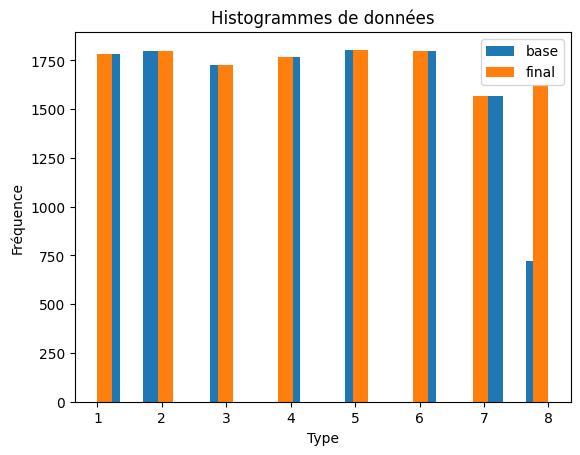

In [37]:
import matplotlib.pyplot as plt
plt.hist(df['essay_set'], bins=20, alpha=1, label='base')
plt.hist(df2['essay_set'], bins=30, alpha=1, label='final')
plt.title('Histogrammes de données')
plt.xlabel('Type')
plt.ylabel('Fréquence')
plt.legend()
plt.show()


En résumé, ce script trace deux histogrammes montrant la distribution des valeurs de la colonne 'essay_set' avant (avec l'étiquette 'base') et après (avec l'étiquette 'final') les manipulations effectuées sur le DataFrame. Cela permet de visualiser visuellement les changements dans la distribution des données après les manipulation

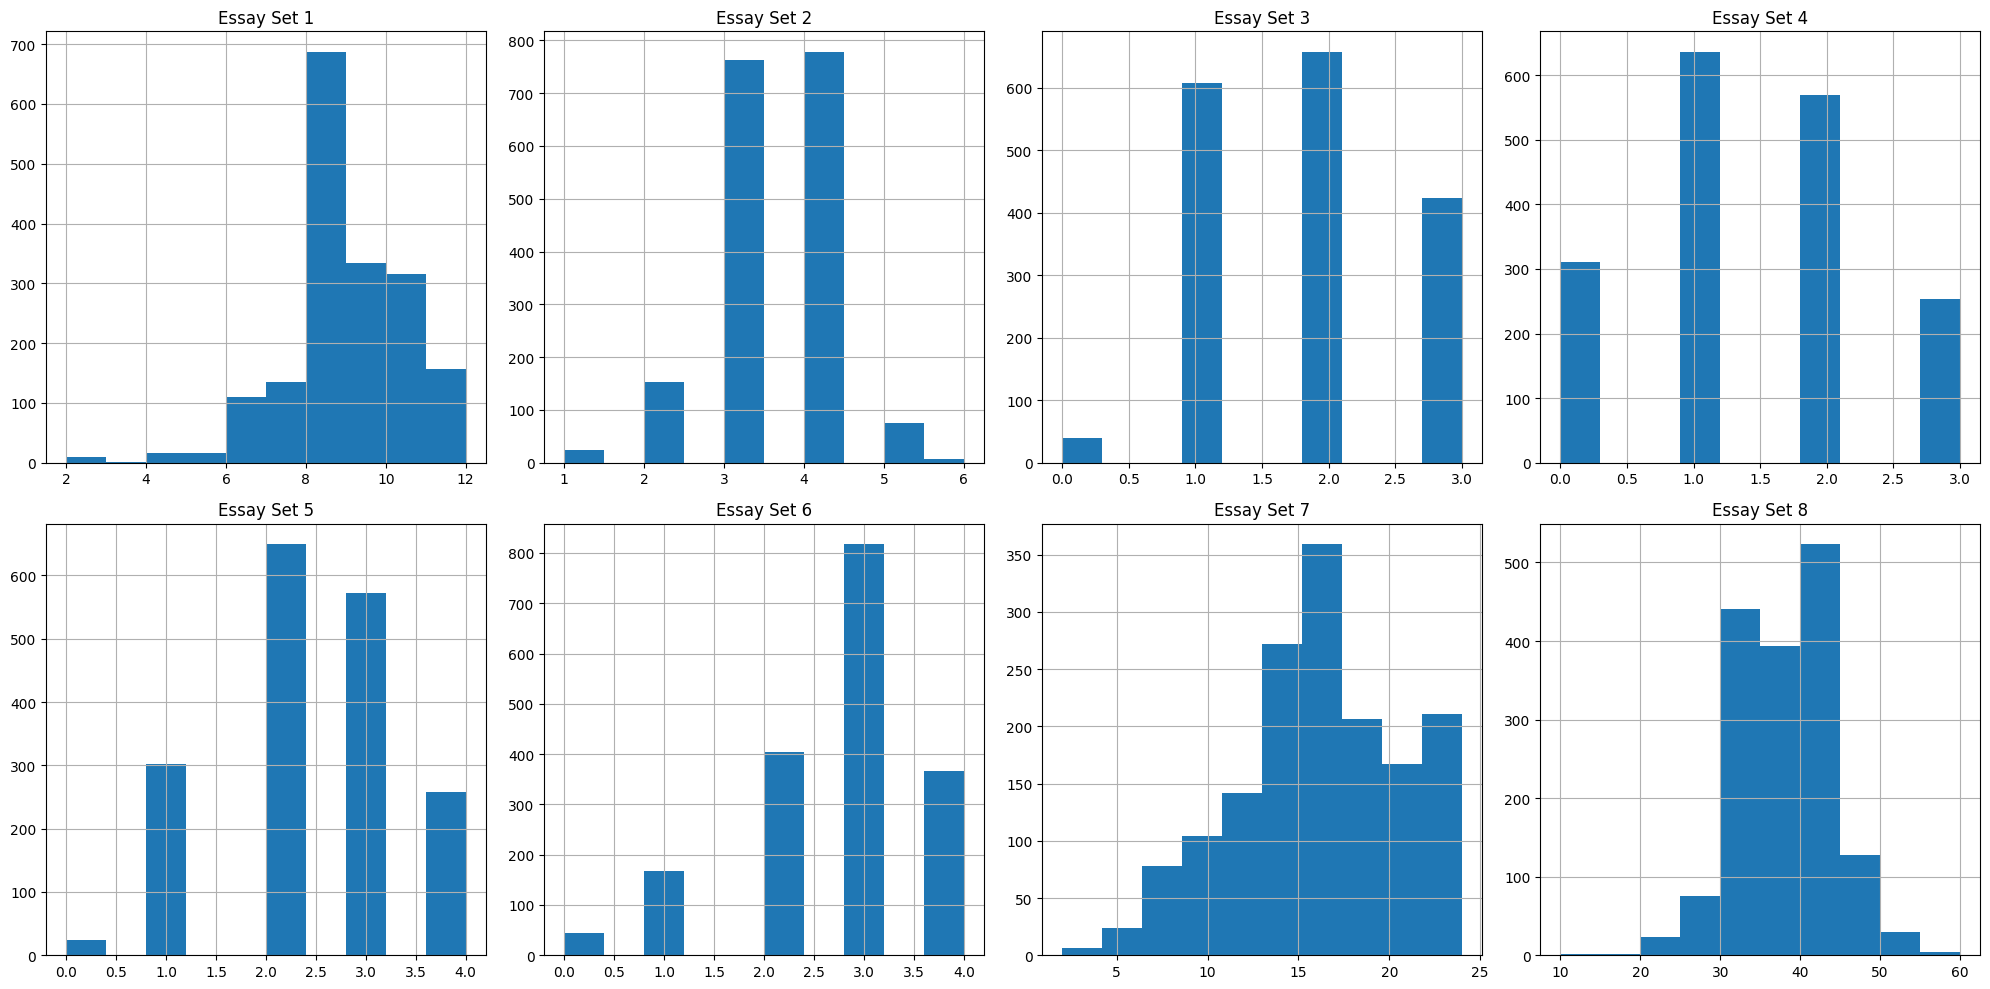

In [38]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(2, 4, figsize=(20, 10))
for i, essay_set_value in enumerate(range(1, 9)):
    ax = axs[i // 4, i % 4] 
    df2['domain1_score'][df2['essay_set'] == essay_set_value].hist(ax=ax)
    ax.set_title(f"Essay Set {essay_set_value}")
plt.tight_layout()
plt.show()


En résumé, ce script crée une figure avec 8 sous-graphiques, chacun montrant un histogramme des scores pour un ensemble d'essais spécifique dans le DataFrame df2. Cela permet de visualiser la distribution des scores pour chaque ensemble d'essais.

In [39]:
from imblearn.over_sampling import RandomOverSampler
import pandas as pd

def overSamplerSousCategorie(data, colonneDuType):
    over_sampler = RandomOverSampler(random_state=42)
    df_resampled = pd.DataFrame()
    for essay_set_value in data[colonneDuType].unique():
        data_subset = data[data[colonneDuType] == essay_set_value]

        # Séparer les caractéristiques et la cible
        X = data_subset.drop('domain1_score', axis=1)
        y = data_subset['domain1_score']
        X_resampled, y_resampled = over_sampler.fit_resample(X, y)
        df_resampled_subset = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.Series(y_resampled, name='domain1_score')], axis=1)
        df_resampled = pd.concat([df_resampled, df_resampled_subset], ignore_index=True)

    return df_resampled

df3 = overSamplerSousCategorie(df2, 'essay_set')


Ce code effectue une opération de suréchantillonnage aléatoire des données pour chaque sous-catégorie d'essais (définie par la colonne 'essay_set') dans un DataFrame. Voici ce qu'il fait en gros :

Importe les bibliothèques nécessaires : imblearn.over_sampling.RandomOverSampler pour le suréchantillonnage aléatoire et pandas pour manipuler les données sous forme de DataFrame.

Définit une fonction appelée overSamplerSousCategorie qui prend deux paramètres : le DataFrame data contenant les données à échantillonner et le nom de la colonne colonneDuType indiquant la sous-catégorie à échantillonner.
Initialise un objet RandomOverSampler pour effectuer le suréchantillonnage aléatoire.

Crée un DataFrame vide pour stocker les données échantillonnées.

Parcourt chaque valeur unique de la colonne spécifiée par colonneDuType dans le DataFrame data.
Sélectionne un sous-ensemble de données où la colonne spécifiée par colonneDuType est égale à la valeur actuelle.
Sépare les caractéristiques et la cible du sous-ensemble de données.

Utilise la méthode fit_resample de l'objet RandomOverSampler pour effectuer le suréchantillonnage aléatoire des caractéristiques et de la cible.

Crée un nouveau DataFrame à partir des caractéristiques et de la cible échantillonnées.
Ajoute ce DataFrame échantillonné au DataFrame global.

Retourne le DataFrame global avec les données échantillonnées pour toutes les sous-catégories.

Enfin, il appelle cette fonction avec un DataFrame spécifique df2 et la colonne 'essay_set', stocke le DataFrame échantillonné résultant dans df3.

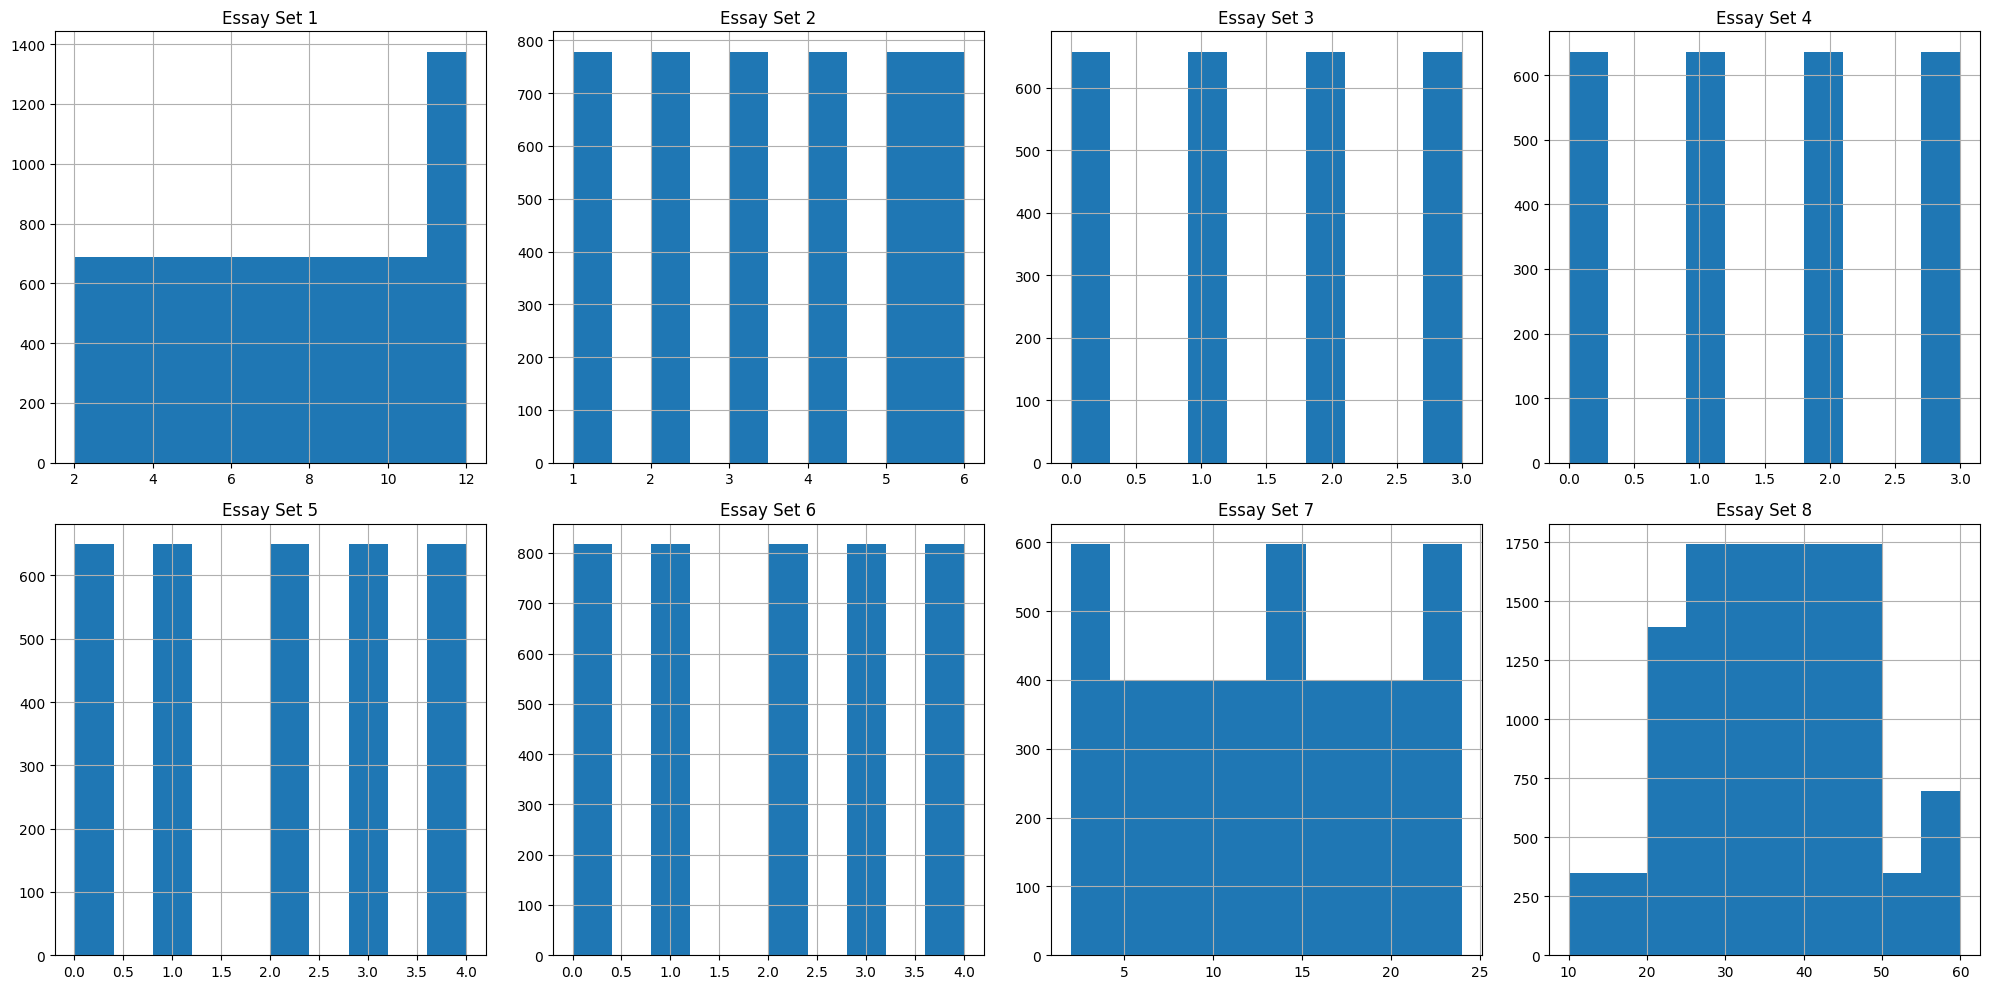

In [40]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(2, 4, figsize=(20, 10))
for i, essay_set_value in enumerate(range(1, 9)):
    ax = axs[i // 4, i % 4]
    df3['domain1_score'][df3['essay_set'] == essay_set_value].hist(ax=ax)
    ax.set_title(f"Essay Set {essay_set_value}")
plt.tight_layout()
plt.show()


ce script crée une figure avec 8 sous-graphiques, chacun montrant un histogramme des scores pour un ensemble d'essais spécifique dans le DataFrame df3, qui est le résultat du suréchantillonnage des données. Cela permet de visualiser la distribution des scores pour chaque ensemble d'essais après le suréchantillonnage.

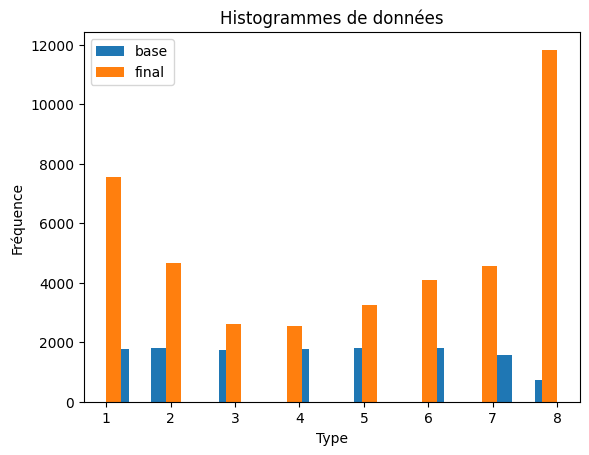

In [41]:
import matplotlib.pyplot as plt
plt.hist(df['essay_set'], bins=20, alpha=1, label='base')
plt.hist(df3['essay_set'], bins=30, alpha=1, label='final')
plt.title('Histogrammes de données')
plt.xlabel('Type')
plt.ylabel('Fréquence')
plt.legend()
plt.show()


ce script trace deux histogrammes montrant la distribution des valeurs de la colonne 'essay_set' avant (avec l'étiquette 'base') et après (avec l'étiquette 'final') le suréchantillonnage des données. Cela permet de visualiser visuellement les changements dans la distribution des données après le suréchantillonnage.

In [42]:
import pandas as pd

# Créez une fonction pour équilibrer les catégories de notes
def equilibrer_categories(df, essay_set, random_seed=42):

    # Obtenez les catégories uniques
    categories = df[essay_set].unique()    
    # Initialisez une liste pour stocker les données équilibrées
    dataframe_equilibree = []
    mean_echantillon = int(df.groupby(essay_set).size().mean())
    
    # Équilibrez chaque catégorie
    for cat in categories:
        cat_data = df[df[essay_set] == cat]
        # Utiliser replace=True pour permettre l'échantillonnage de plus d'éléments que ceux présents dans la population
        dataframe_equilibree.append(cat_data.sample(mean_echantillon, replace=True, random_state=random_seed))
    
    dataframe_equilibree = pd.concat(dataframe_equilibree)
    dataframe_equilibree = dataframe_equilibree.sample(frac=1, random_state=random_seed)
    
    return dataframe_equilibree

# Supposons que df3 soit votre DataFrame initial
# df4 contiendra les données équilibrées
df4 = equilibrer_categories(df3, 'essay_set')
print(df4['essay_set'].value_counts())


essay_set
4    5142
1    5142
6    5142
8    5142
3    5142
2    5142
7    5142
5    5142
Name: count, dtype: int64


Ce script crée une fonction appelée equilibrer_categories qui équilibre les catégories de notes dans un DataFrame en échantillonnant aléatoirement des données pour chaque catégorie. Voici ce qu'il fait en gros :
Définition de la fonction : La fonction equilibrer_categories prend trois paramètres : le DataFrame initial (df), le nom de la colonne contenant les catégories (essay_set), et une valeur de graine aléatoire pour assurer la reproductibilité des résultats (random_seed=42).

Récupération des catégories uniques : Le script récupère toutes les catégories uniques de la colonne spécifiée par essay_set dans le DataFrame.

Initialisation d'une liste vide : Une liste vide appelée dataframe_equilibree est initialisée pour stocker les données équilibrées.

Calcul de la taille moyenne de l'échantillon : Le script calcule la taille moyenne de l'échantillon pour chaque catégorie en prenant la moyenne du nombre d'éléments dans chaque catégorie.
Boucle sur chaque catégorie : Pour chaque catégorie unique, le script sélectionne les données correspondantes et échantillonne aléatoirement des données avec remplacement pour obtenir une taille d'échantillon égale à la taille moyenne calculée précédemment. Ces échantillons sont ajoutés à la liste dataframe_equilibree.
Concaténation des échantillons : Une fois que tous les échantillons équilibrés ont été obtenus, ils sont concaténés dans une seule DataFrame.

Mélange des données : Les données sont mélangées pour garantir qu'elles sont bien réparties.
Retour de la DataFrame équilibrée : La fonction retourne la DataFrame équilibrée.
Appel de la fonction : La fonction est appelée avec le DataFrame df3 et la colonne 'essay_set', et le résultat équilibré est stocké dans df4.

Affichage du décompte des catégories : Le décompte du nombre d'éléments pour chaque valeur unique de la colonne 'essay_set' dans la DataFrame équilibrée df4 est affiché pour vérifier que les catégories sont maintenant équilibrées.

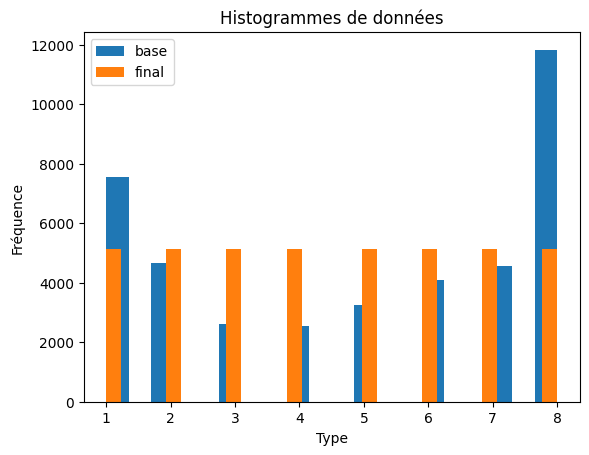

In [43]:
import matplotlib.pyplot as plt
plt.hist(df3['essay_set'], bins=20, alpha=1, label='base')
plt.hist(df4['essay_set'], bins=30, alpha=1, label='final')
plt.title('Histogrammes de données')
plt.xlabel('Type')
plt.ylabel('Fréquence')
plt.legend()
plt.show()

ce script trace deux histogrammes montrant la distribution des valeurs de la colonne 'essay_set' avant (avec l'étiquette 'base') et après (avec l'étiquette 'final') l'équilibrage des catégories de notes. Cela permet de visualiser visuellement les changements dans la distribution des données après l'équilibrage.

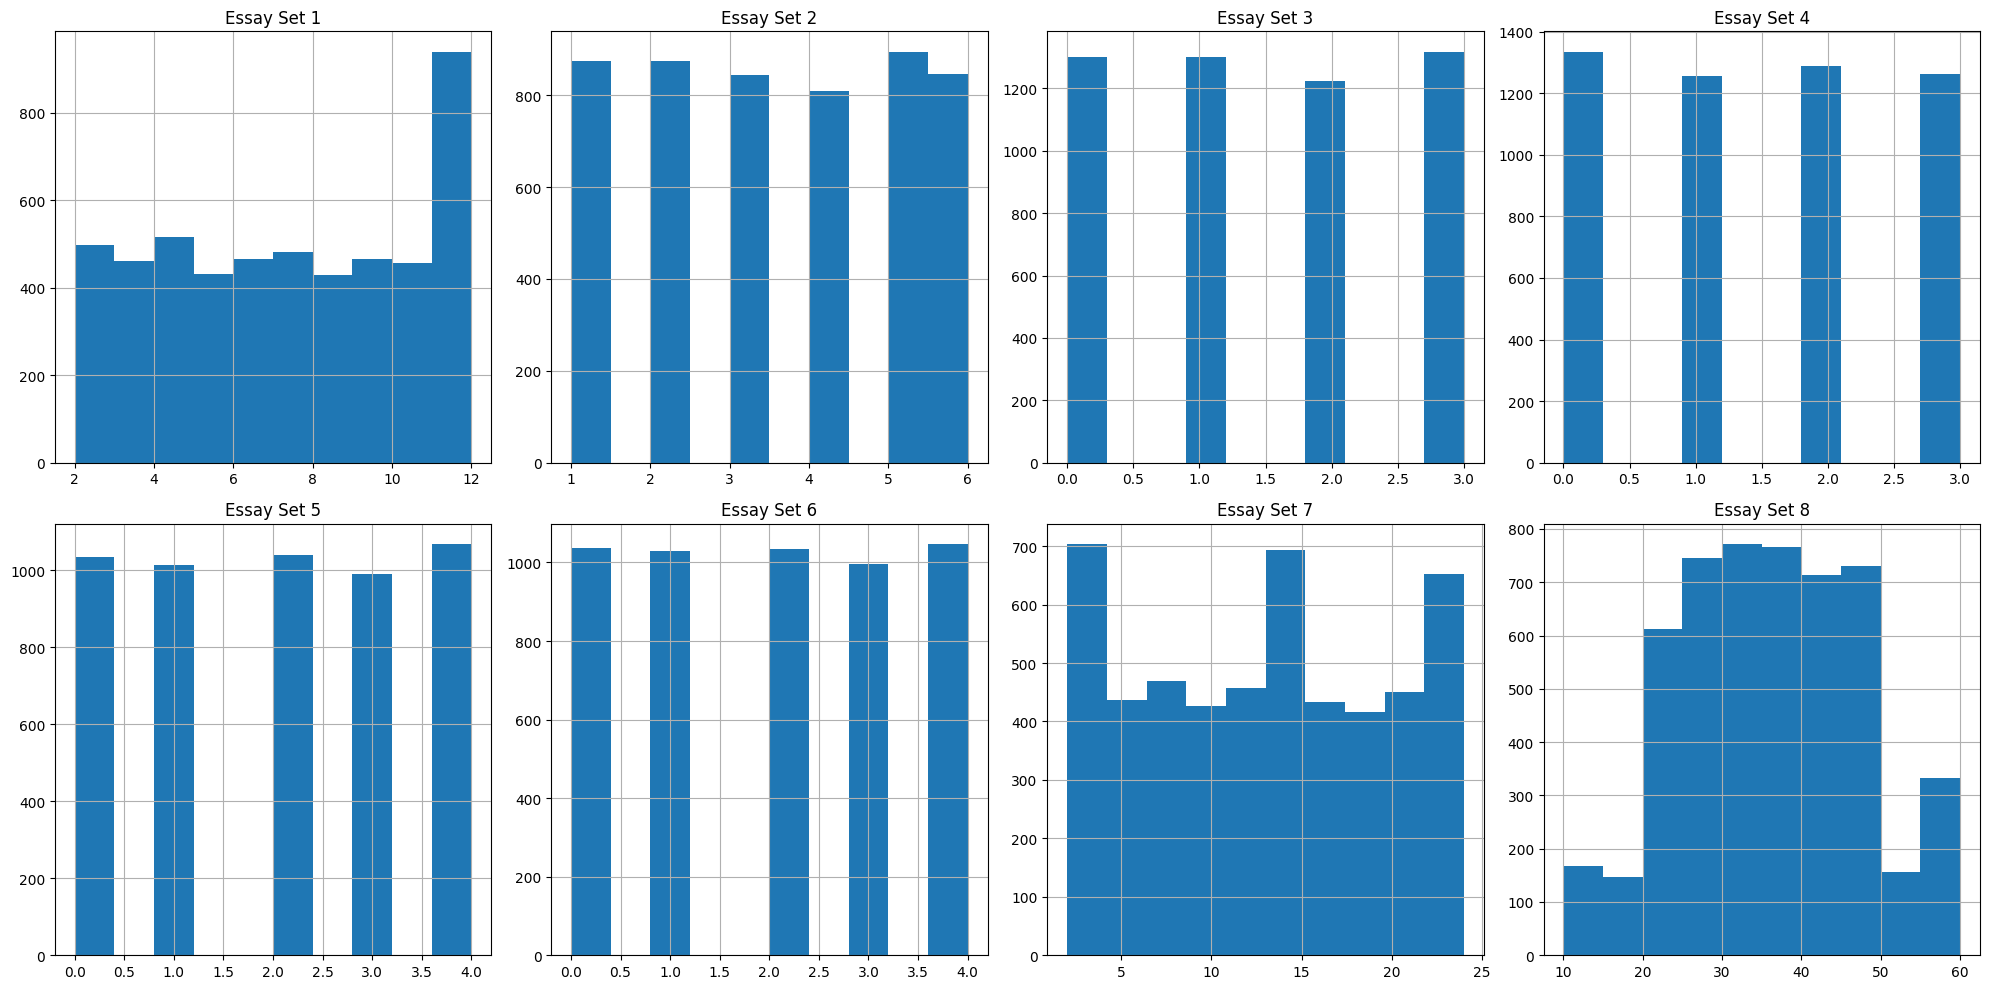

In [44]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(2, 4, figsize=(20, 10))
for i, essay_set_value in enumerate(range(1, 9)):
    ax = axs[i // 4, i % 4]
    df4['domain1_score'][df4['essay_set'] == essay_set_value].hist(ax=ax)
    ax.set_title(f"Essay Set {essay_set_value}")
plt.tight_layout()
plt.show()

ce script crée une figure avec 8 sous-graphiques, chacun montrant un histogramme des scores pour un ensemble d'essais spécifique dans le DataFrame df4, qui contient les données après l'équilibrage des catégories de notes. Cela permet de visualiser la distribution des scores pour chaque ensemble d'essais après l'équilibrage.

In [50]:
score_counts = []
for essay_set_value in df4['essay_set'].unique():
    count = df4['domain1_score'][df4['essay_set'] == essay_set_value].value_counts()
    score_counts.append((essay_set_value, count))
for essay_set_value, count in score_counts:
    print(f"Essay Set {essay_set_value}:\n{count}\n")

Essay Set 4:
domain1_score
0    1334
2    1288
3    1263
1    1257
Name: count, dtype: int64

Essay Set 1:
domain1_score
4     515
2     497
12    492
7     482
6     465
9     465
3     461
10    457
11    447
5     431
8     430
Name: count, dtype: int64

Essay Set 6:
domain1_score
4    1046
0    1036
2    1035
1    1028
3     997
Name: count, dtype: int64

Essay Set 8:
domain1_score
49    180
37    178
10    167
60    167
55    166
44    165
25    163
36    162
34    161
21    161
33    157
50    156
31    155
48    154
28    153
30    152
24    152
38    151
29    151
22    151
20    149
41    147
15    146
32    146
39    142
46    142
27    141
26    138
47    136
40    135
35    134
43    133
42    133
45    118
Name: count, dtype: int64

Essay Set 3:
domain1_score
3    1317
1    1302
0    1300
2    1223
Name: count, dtype: int64

Essay Set 2:
domain1_score
5    894
1    875
2    874
6    846
3    844
4    809
Name: count, dtype: int64

Essay Set 7:
domain1_score
4     247
6    

Ce script parcourt chaque valeur unique de la colonne 'essay_set' dans le DataFrame df4. 

Pour chaque valeur de 'essay_set', il compte le nombre d'occurrences de chaque valeur de 'domain1_score' associée à cette valeur de 'essay_set'. Ces résultats sont stockés dans une liste appelée score_counts, où chaque élément est un tuple contenant la valeur de 'essay_set' et le compte des valeurs de 'domain1_score'.

Enfin, il imprime les résultats pour chaque ensemble d'essais, affichant ainsi la distribution des scores pour chaque ensemble d'essais dans votre DataFrame df4.

In [52]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer

nltk.download('punkt')
nltk.download('stopwords')

def preprocess_text(text):
    # Tokenization
    tokens = word_tokenize(text)
    return tokens

def extract_features(text):
    # Prétraitement du texte
    tokens = preprocess_text(text)
    
    # Calcul de la longueur du texte
    text_length = len(tokens)
    
    # Calcul du nombre de mots uniques
    unique_words = len(set(tokens))
    
    # Calcul du nombre de signes de ponctuation
    punctuation_count = sum([1 for char in text if char in string.punctuation])
    
    # Autres caractéristiques pertinentes que vous souhaitez extraire
    
    return {
        'text_length': text_length,
        'unique_words': unique_words,
        'punctuation_count': punctuation_count,
        # Ajoutez d'autres caractéristiques ici
    }

# Exemple de données
essai_1 = "Dear local newspaper, I think effects computers have on people are great learning skills/affects because they give us time to chat with friends/new people, helps us learn about the globe(astronomy) and keeps us out of troble! Thing about! Dont you think so? How would you feel if your teenager is always on the phone with friends! Do you ever time to chat with your friends or buisness partner about things. Well now - there's a new way to chat the computer, theirs plenty of sites on the internet to do so: @ORGANIZATION1, @ORGANIZATION2, @CAPS1, facebook, myspace ect. Just think now while your setting up meeting with your boss on the computer, your teenager is having fun on the phone not rushing to get off cause you want to use it. How did you learn about other countrys/states outside of yours? Well I have by computer/internet, it's a new way to learn about what going on in our time! You might think your child spends a lot of time on the computer, but ask them so question about the economy, sea floor spreading or even about the @DATE1's you'll be surprise at how much he/she knows. Believe it or not the computer is much interesting then in class all day reading out of books. If your child is home on your computer or at a local library, it's better than being out with friends being fresh, or being perpressured to doing something they know isnt right. You might not know where your child is, @CAPS2 forbidde in a hospital bed because of a drive-by. Rather than your child on the computer learning, chatting or just playing games, safe and sound in your home or community place. Now I hope you have reached a point to understand and agree with me, because computers can have great effects on you or child because it gives us time to chat with friends/new people, helps us learn about the globe and believe or not keeps us out of troble. Thank you for listening."
essai_2 = "Dear @CAPS1 @CAPS2, I believe that using computers will benefit us in many ways like talking and becoming friends will others through websites like facebook and mysace. Using computers can help us find coordibates, locations, and able ourselfs to millions of information. Also computers will benefit us by helping with jobs as in planning a house plan and typing a @NUM1 page report for one of our jobs in less than writing it. Now lets go into the wonder world of technology. Using a computer will help us in life by talking or making friends on line. Many people have myspace, facebooks, aim, these all benefit us by having conversations with one another. Many people believe computers are bad but how can you make friends if you can never talk to them? I am very fortunate for having a computer that can help with not only school work but my social life and how I make friends. Computers help us with finding our locations, coordibates and millions of information online. If we didn't go on the internet a lot we wouldn't know how to go onto websites that @MONTH1 help us with locations and coordinates like @LOCATION1. Would you rather use a computer or be in @LOCATION3. When your supposed to be vacationing in @LOCATION2. Million of information is found on the internet. You can as almost every question and a computer will have it. Would you rather easily draw up a house plan on the computers or take @NUM1 hours doing one by hand with ugly erazer marks all over it, you are garrenteed that to find a job with a drawing like that. Also when appling for a job many workers must write very long papers like a @NUM3 word essay on why this job fits you the most, and many people I know don't like writing @NUM3 words non-stopp for hours when it could take them I hav an a computer. That is why computers we needed a lot now adays. I hope this essay has impacted your descion on computers because they are great machines to work with. The other day I showed my mom how to use a computer and she said it was the greatest invention sense sliced bread! Now go out and buy a computer to help you chat online with friends, find locations and millions of information on one click of the button and help your self with getting a job with neat, prepared, printed work that your boss will love."

# Extraction des caractéristiques pour chaque essai
features_essai_1 = extract_features(essai_1)
features_essai_2 = extract_features(essai_2)

# Affichage des caractéristiques extraites
print("Caractéristiques de l'essai 1:", features_essai_1)
print("Caractéristiques de l'essai 2:", features_essai_2)

# Création de vecteurs à partir des caractéristiques extraites
vectorizer = CountVectorizer()
X = vectorizer.fit_transform([essai_1, essai_2])

# Affichage des vecteurs résultants
print("Vecteur pour l'essai 1:", X.toarray()[0])
print("Vecteur pour l'essai 2:", X.toarray()[1])


Caractéristiques de l'essai 1: {'text_length': 386, 'unique_words': 181, 'punctuation_count': 55}
Caractéristiques de l'essai 2: {'text_length': 464, 'unique_words': 209, 'punctuation_count': 46}
Vecteur pour l'essai 1: [ 0  8  0  1  1  0  1  0  0  1  0  0  4  0  0  1  0  1  1  2  0  1  4  0
  1  3  2  0  1  1  1  0  1  1  0  0  2  1  1  1  1  4  1  5  1  0  1  7
  2  0  0  0  0  1  1  1  1  0  1  0  2  1  0  1  0  0  1  0  1  1  2  0
  0  1  1  0  1  0  1  0  0  0  1  1  1  0  0  1  5  1  1  0  1  0  1  1
  2  0  1  2  0  0  0  0  4  1  1  0  0  2  2  1  1  0  0  3  2  0  4  0
  1  2  0  0  5  1  5  0  0  2  2  2  1  4  2  0  0  1  0  0  0  1  1  2
  0  0  0  0  0  1  0  0  0  0  0  0  1  1  2  0  0  0  0  0  2  0  0  0
  1  0  0  0  4  1  0  4  3  0  0  7  1 10  0  0  0  0  9  1  1  1  0  1
  0  4  1  0  0  0  1  3  1  2  1  0  0  1  1  1  0  0  1  1  1  1  0  1
  1  1  0  0  1  0  0  1  1  0  1  1  0  3  0  1  1  1  1  1  0  0  1  0
  0  0  0  2  2  1  0 12  1  1  1  1  0  2  1  1  

[nltk_data] Downloading package punkt to /Users/kenneth/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/kenneth/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Premiere  facon de vectoriser nos essays.

Fonction de prétraitement du texte : Il définit une fonction preprocess_text qui prend une chaîne de texte en entrée et la tokenise en utilisant la méthode word_tokenize de NLTK.

Fonction d'extraction des caractéristiques : Il définit une fonction extract_features qui prend une chaîne de texte en entrée, prétraite le texte en utilisant la fonction preprocess_text, puis extrait différentes caractéristiques telles que la longueur du texte, le nombre de mots uniques et le nombre de signes de ponctuation.

Exemple de données : Il définit deux exemples de textes (essai_1 et essai_2).
Extraction des caractéristiques : Il extrait les caractéristiques pour chaque essai en appelant la fonction extract_features.

Affichage des caractéristiques extraites : Il affiche les caractéristiques extraites pour chaque essai.

Création de vecteurs à partir des caractéristiques extraites : Il utilise CountVectorizer pour créer des vecteurs à partir des caractéristiques extraites. Cette étape consiste à représenter chaque essai sous forme de vecteur où chaque élément du vecteur correspond au nombre d'occurrences d'une caractéristique spécifique.

Affichage des vecteurs résultants : Il affiche les vecteurs résultants pour chaque essai. Chaque vecteur montre le nombre d'occurrences de chaque mot dans le texte correspondant.

In [53]:
import nltk
import string
from nltk.corpus import stopwords

nltk.download('punkt')
nltk.download('words')
nltk.download('averaged_perceptron_tagger')

def calculer_vecteur(essay):
    
    # Tokenisation du texte en mots
    words = nltk.word_tokenize(essay)

    capital_mot = [word for word in words if word[0].isupper()]
    capitalisation_score = len(capital_mot) / len(words) if len(words) > 0 else 0

    unique_words = set(words)
    style_score = len(unique_words) / len(words) if len(words) > 0 else 0

    paragraphe = essay.split('\n\n')
    organisation_score = len(paragraphe)

    nombre_mots = len(words)

    punctuation_count = sum([1 for char in essay if char in string.punctuation])
    punctuation_score = punctuation_count / len(essay) if len(essay) > 0 else 0

    english_words = set(nltk.corpus.words.words())
    orthographe_score = sum(word.lower() not in english_words for word in words) / len(words) if len(words) > 0 else 0

    phrase = nltk.sent_tokenize(essay)
    sentence_count = len(phrase)
    average_sentence_length = sum(len(nltk.word_tokenize(sentence)) for sentence in phrase) / sentence_count if sentence_count > 0 else 0
    structure_phrase_score = sentence_count / average_sentence_length if average_sentence_length > 0 else 0

    # utilisation correcte de la ponctuation)
    conventions_score = (1 - punctuation_score) * 0.5 

    unique_words_count = len(set(words))
    total_words_count = len(words)
    champ_lexical = unique_words_count / total_words_count if total_words_count > 0 else 0

    # Score d'efficacité des phrases (ex. longueur moyenne des phrases)
    sentence_efficiency_score = 1 / structure_phrase_score
        
    pejorative_terms = ['bad', 'ugly', 'hate', 'stupid']
    mot_pejoratif = len([word for word in words if word.lower() in pejorative_terms]) / len(words) if len(words) > 0 else 0
    
    overusage_punctuation = punctuation_count / len(words) if len(words) > 0 else 0

    # Création du vecteur
    vecteur_complexite = [
        nombre_mots,
        punctuation_score,
        orthographe_score,
        structure_phrase_score,
        conventions_score,
        champ_lexical,
        sentence_efficiency_score,
        mot_pejoratif,
        punctuation_count,
        overusage_punctuation,
        capitalisation_score,
        style_score,
        organisation_score,
        
    ]
    
    return vecteur_complexite

# Exemple d'utilisation de la fonction
essay_exemple = "In the story the test was if she could overcome her homesickness. When she want to the greenhouse all of the. plants and flower brought back memories of her homeland. When she saw the flower it reminded her of the times life she would get water from the well and and a flower was floating in it. So after the winter she would go back to the place and see if she was still homesick. I feel she ended it that way because it shows that she will persevere and not give up and try again  "
vecteur_exemple = calculer_vecteur(essay_exemple)
print("Vecteur caracteristique ", vecteur_exemple)


[nltk_data] Downloading package punkt to /Users/kenneth/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package words to /Users/kenneth/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/kenneth/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


Vecteur caracteristique  [101, 0.010351966873706004, 0.0891089108910891, 0.3564356435643565, 0.494824016563147, 0.594059405940594, 2.8055555555555554, 0.0, 5, 0.04950495049504951, 0.04950495049504951, 0.594059405940594, 1]



Ce script définit une fonction appelée calculer_vecteur qui prend un texte d'essai en entrée et calcule un vecteur de caractéristiques pour ce texte. Voici un aperçu de ce que fait la fonction :

Tokenisation : Le texte de l'essai est d'abord divisé en mots à l'aide de la fonction nltk.word_tokenize.

Calcul de diverses caractéristiques : La fonction calcule plusieurs caractéristiques basées sur le texte de l'essai, telles que :

Le pourcentage de mots commençant par une majuscule.
Le nombre de mots uniques par rapport au nombre total de mots.
Le nombre de paragraphes.
Le nombre de mots dans l'essai.
Le pourcentage de signes de ponctuation par rapport à la longueur totale de l'essai.
Le pourcentage de mots non reconnus dans le dictionnaire anglais par rapport au nombre total de mots.
Le nombre de phrases dans l'essai.
La longueur moyenne des phrases dans l'essai.
L'utilisation correcte de la ponctuation.
Le pourcentage de mots péjoratifs dans l'essai.
Le nombre de signes de ponctuation par rapport au nombre total de mots.
Le pourcentage d'utilisation excessive de la ponctuation.
Le score de capitalisation.
Le score de style.
Le score d'organisation.

Création du vecteur de caractéristiques : Toutes ces caractéristiques sont regroupées dans un vecteur nommé vecteur_complexite.

En résumé, cette fonction prend un texte d'essai en entrée et calcule un vecteur de caractéristiques qui peut être utilisé pour quantifier divers aspects du texte, tels que la complexité, le style, l'organisation et l'utilisation de la langue.

In [55]:
import pandas as pd
import nltk
import string
from nltk.corpus import words
from nltk.corpus import stopwords

# Télécharger les ressources NLTK si elles ne sont pas déjà téléchargées
nltk.download('punkt', quiet=True)
nltk.download('words', quiet=True)
nltk.download('stopwords', quiet=True)

# Charger la liste de mots anglais
english_words = set(words.words())

# Charger les mots vides anglais
stop_words = set(stopwords.words('english'))

# Fonction pour calculer le score d'orthographe
def calculer_orthographe_score(words):
    return sum(word.lower() not in english_words for word in words) / len(words) if len(words) > 0 else 0

# Fonction pour calculer le score de mots péjoratifs
def calculer_mot_pejoratif_score(words):
    pejorative_terms = set(['bad', 'ugly', 'hate', 'stupid'])
    return sum(word.lower() in pejorative_terms for word in words) / len(words) if len(words) > 0 else 0

# Tokenisation des essais
df4['essay_words'] = df4['essay'].apply(nltk.word_tokenize)

# Calcul des caractéristiques
df4['capitalisation_score'] = df4['essay'].apply(lambda x: sum(word[0].isupper() for word in nltk.word_tokenize(x)) / len(nltk.word_tokenize(x)) if len(nltk.word_tokenize(x)) > 0 else 0)
df4['style_score'] = df4['essay_words'].apply(lambda x: len(set(x)) / len(x) if len(x) > 0 else 0)
df4['organisation_score'] = df4['essay'].apply(lambda x: x.count('\n\n'))
df4['nombre_mots'] = df4['essay_words'].apply(len)
df4['punctuation_score'] = df4['essay'].apply(lambda x: sum(1 for char in x if char in string.punctuation) / len(x) if len(x) > 0 else 0)
# Calcul du score d'orthographe
df4['orthographe_score'] = df4['essay_words'].apply(calculer_orthographe_score)
df4['structure_phrase_score'] = df4['essay'].apply(lambda x: len(nltk.sent_tokenize(x)) / (sum(len(nltk.word_tokenize(sentence)) for sentence in nltk.sent_tokenize(x)) / len(nltk.sent_tokenize(x))) if len(nltk.sent_tokenize(x)) > 0 else 0)
df4['conventions_score'] = (1 - df4['punctuation_score']) * 0.5
df4['champ_lexical'] = df4['essay_words'].apply(lambda x: len(set(x)) / len(x) if len(x) > 0 else 0)
df4['sentence_efficiency_score'] = 1 / df4['structure_phrase_score']
df4['mot_pejoratif'] = df4['essay_words'].apply(calculer_mot_pejoratif_score)
df4['punctuation_count'] = df4['essay'].apply(lambda x: sum(x.count(char) for char in string.punctuation))
df4['overusage_punctuation'] = df4.apply(lambda row: row['punctuation_count'] / row['nombre_mots'] if row['nombre_mots'] > 0 else 0, axis=1)
df4


Chargement des mots anglais et des mots vides : Il charge les listes de mots anglais et de mots vides en utilisant les corpus disponibles dans NLTK.

Définition de fonctions de calcul de score : Il définit deux fonctions, calculer_orthographe_score et calculer_mot_pejoratif_score, qui prennent une liste de mots en entrée et calculent le score d'orthographe et le score de mots péjoratifs, respectivement.

Tokenisation des essais : Il utilise la fonction nltk.word_tokenize pour tokeniser les essais, c'est-à-dire les diviser en mots individuels.

Calcul des caractéristiques : Il calcule plusieurs caractéristiques pour chaque essai, telles que :

Le score de capitalisation.
Le score de style.
Le score d'organisation.
Le nombre de mots dans l'essai.
Le score de ponctuation.
Le score d'orthographe.
Le score de structure de phrase.
Le score de conventions.
Le champ lexical.
Le score d'efficacité des phrases.
Le score de mots péjoratifs.
Le nombre de signes de ponctuation.
L'utilisation excessive de la ponctuation.

Ajout des caractéristiques au DataFrame : Les caractéristiques calculées sont ajoutées en tant que colonnes au DataFrame df4.

En résumé, ce script calcule plusieurs caractéristiques pour chaque essai dans le DataFrame df4 en utilisant des techniques telles que la tokenisation, le calcul de scores et l'analyse linguistique. Ces caractéristiques pourront être utilisées pour l'analyse ultérieure ou pour l'entraînement de modèles d'apprentissage automatique.

In [56]:
import re

def extraire_mentions(texte):
    mentions = re.findall(r'@(\w+)', texte)
    return mentions

def compter_mentions(texte):
    mentions = extraire_mentions(texte)
    compteur_mentions = {}
    for mention in mentions:
        if mention in compteur_mentions:
            compteur_mentions[mention] += 1
        else:
            compteur_mentions[mention] = 1
    return compteur_mentions

# Exemple d'utilisation
texte_exemple = "Bonjour @user1, comment vas-tu ? @user2 est là aussi ?"
mentions = extraire_mentions(texte_exemple)
print("Mentions spéciales extraites :", mentions)

compteur_mentions = compter_mentions(texte_exemple)
print("Nombre de chaque mention :", compteur_mentions)


Mentions spéciales extraites : ['user1', 'user2']
Nombre de chaque mention : {'user1': 1, 'user2': 1}


Ce script définit deux fonctions pour extraire et compter les mentions spéciales dans un texte :

Fonction extraire_mentions : Cette fonction utilise des expressions régulières pour rechercher toutes les mentions spéciales dans le texte. Les mentions spéciales commencent par le symbole "@" suivi de caractères alphanumériques (et éventuellement d'autres caractères spéciaux). Cette fonction renvoie une liste de toutes les mentions spéciales trouvées dans le texte.

Fonction compter_mentions : Cette fonction utilise la fonction extraire_mentions pour obtenir toutes les mentions spéciales dans le texte, puis elle compte le nombre d'occurrences de chaque mention spéciale. Les résultats sont stockés dans un dictionnaire où la clé est le nom de la mention spéciale et la valeur est le nombre d'occurrences de cette mention dans le texte.

Cela nous permet de voir quelles mentions spéciales sont présentes dans le texte et combien de fois elles apparaissent.

In [57]:
def presence_mentions(texte):
    # Extraire les mentions spéciales
    mentions = extraire_mentions(texte)
    # Si des mentions sont trouvées, retourner 1 pour indiquer leur présence, sinon retourner 0
    if mentions:
        return 'oui'
    else:
        return 'non'

# Exemple d'utilisation
texte_exemple = "Bonjour @user1, comment vas-tu ?"
presence = presence_mentions(texte_exemple)
print("Présence de mentions spéciales :", presence)


Présence de mentions spéciales : oui


Cette fonction presence_mentions vérifie simplement si des mentions spéciales sont présentes dans un texte donné. Elle utilise la fonction extraire_mentions pour extraire toutes les mentions spéciales du texte. Ensuite, elle vérifie si des mentions ont été extraites. Si des mentions sont trouvées, elle retourne "oui" pour indiquer leur présence, sinon elle retourne "non". C'est utile pour déterminer rapidement si un texte contient des mentions spéciales, ce qui peut être pertinent 

In [ ]:
df4['presence mentions speciale'].value_counts()

presence mentions speciale
oui    12216
non     8136
Name: count, dtype: int64

Cette ligne de code comptera le nombre de fois que chaque valeur apparaît dans la colonne "presence_mentions_speciale" de votre DataFrame df4 et renverra un objet Series contenant ces comptages. On peut l'utiliser pour obtenir un aperçu rapide de la distribution des valeurs dans cette colonne.